In [1]:
import os
os.getcwd() 

'/Users/izapreev/Projects/ML-PT'

In [2]:
# Make sure the source code auto reloads into the kernel\n
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

from src.utils.logger import logger

In [4]:
# Load the provided test data
data_df = pd.read_csv('./data/part_10_wrangled.csv')

In [5]:
# The only na values are for strings - replace with empty
data_df = data_df.fillna('')
# Infer the best data types
data_df = data_df.convert_dtypes()
# Check on the column types
data_df.dtypes

EVENT_ID                   string
CLIENT_IP                  string
CLIENT_USERAGENT           string
IS_USERAGENT_VALID        boolean
REQUEST_SIZE                Int64
RESPONSE_CODE               Int64
MATCHED_VARIABLE_SRC       string
MATCHED_VARIABLE_NAME      string
MATCHED_VARIABLE_VALUE     string
dtype: object

In [6]:
# Define the plotting function
def plot_variance_explained(extractor):
    feature_names, var_values = extractor.get_feature_names_out()
    fig, ax = plt.subplots(figsize=(15, 5))
    plt.xticks(rotation=45, ha='right')
    plt.bar(x=feature_names, height=var_values)

In [7]:
##############################################################
# 01. The default run with Scaling and Normalization Enabled
#     Using all columns for features but:
#         EVENT_ID

In [8]:
from src.features.extractor import FeatureExtractor

# Get the features for all the data with Scaling and PCA the data
extractor_01 = FeatureExtractor()
X_01 = extractor_01.fit_transform(data_df)

13:54:51 INFO (extractor:61): Actual Non-Feature Columns: ['EVENT_ID']
13:54:51 INFO (extractor:65): Actual Scaling flag: True
13:54:51 INFO (extractor:73): Actual PCA arguments: {'n_components': 0.999999}, the PCA is: Enabled
13:54:51 INFO (extractor:110): Start fitting the Feature Extraction model
13:54:51 INFO (extractor:105): Considering feature columns: ['CLIENT_IP', 'CLIENT_USERAGENT', 'IS_USERAGENT_VALID', 'REQUEST_SIZE', 'RESPONSE_CODE', 'MATCHED_VARIABLE_SRC', 'MATCHED_VARIABLE_NAME', 'MATCHED_VARIABLE_VALUE']
13:54:51 INFO (extractor:115): Fitting the vectorizer for: "CLIENT_USERAGENT"
13:54:51 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_SRC"
13:54:51 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_NAME"
13:54:51 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_VALUE"
13:54:53 INFO (extractor:126): Start fitting the scaler
13:54:53 INFO (extractor:131): Start fitting the PCA
13:54:53 INFO (extractor:134): Fitting 

13:54:54 INFO (extractor:139): The PCA feature name out:
['pca0' 'pca1' 'pca2' 'pca3' 'pca4' 'pca5' 'pca6' 'pca7' 'pca8']
13:54:54 INFO (extractor:147): The PCA components (absolute, maximum) relations with features:
pca0    REQUEST_SIZE
pca1     CLIENT_IP_7
pca2     CLIENT_IP_2
pca3     CLIENT_IP_2
pca4     CLIENT_IP_5
pca5     CLIENT_IP_1
pca6     CLIENT_IP_3
pca7     CLIENT_IP_5
pca8     CLIENT_IP_3
dtype: object
13:54:54 INFO (extractor:154): The main features contributed to PCA components:
['REQUEST_SIZE', 'CLIENT_IP_7', 'CLIENT_IP_2', 'CLIENT_IP_2', 'CLIENT_IP_5', 'CLIENT_IP_1', 'CLIENT_IP_3', 'CLIENT_IP_5', 'CLIENT_IP_3']
13:54:54 INFO (extractor:155): The variance explained per PCA component:
[9.53606314e-01 2.46938817e-02 2.09417498e-02 4.85816958e-04
 1.50394316e-04 6.45124298e-05 3.06114516e-05 2.49536267e-05
 1.05135789e-06]


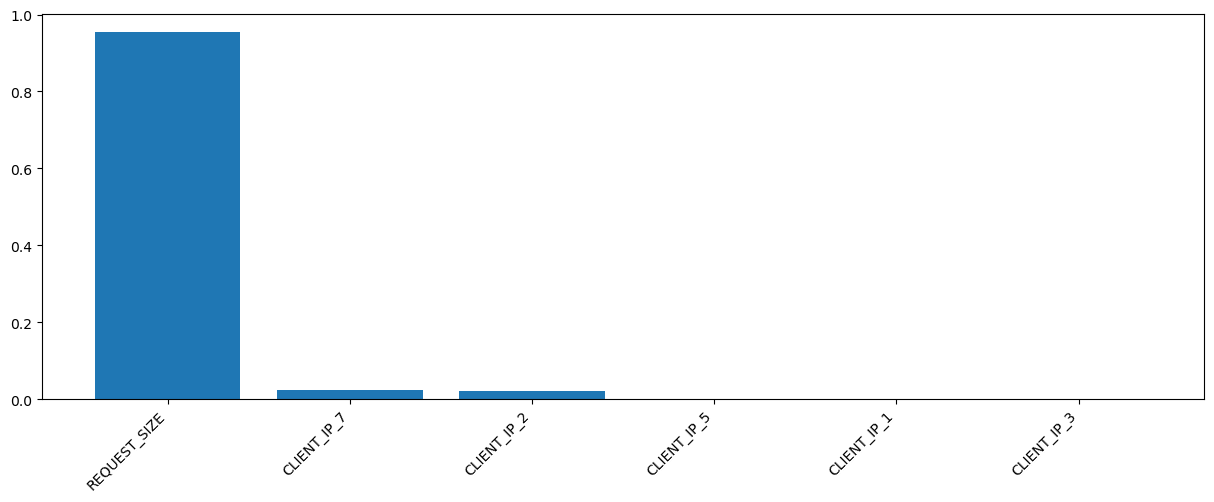

In [9]:
# Plot the resulting feature space data
plot_variance_explained(extractor_01)

In [27]:
##############################################################
# 02. The default run with Scaling and Normalization Enabled
#     Using all columns for features but:
#         EVENT_ID, REQUEST_SIZE

In [28]:
# Get the features with additional ignores with Scaling and PCA the data
extractor_02 = FeatureExtractor(ignore_columns=['EVENT_ID', 'REQUEST_SIZE'])
X_02 = extractor_02.fit_transform(data_df)

13:55:48 INFO (extractor:61): Actual Non-Feature Columns: ['EVENT_ID', 'REQUEST_SIZE']
13:55:48 INFO (extractor:65): Actual Scaling flag: True
13:55:48 INFO (extractor:73): Actual PCA arguments: {'n_components': 0.999999}, the PCA is: Enabled
13:55:48 INFO (extractor:110): Start fitting the Feature Extraction model
13:55:48 INFO (extractor:105): Considering feature columns: ['CLIENT_IP', 'CLIENT_USERAGENT', 'IS_USERAGENT_VALID', 'RESPONSE_CODE', 'MATCHED_VARIABLE_SRC', 'MATCHED_VARIABLE_NAME', 'MATCHED_VARIABLE_VALUE']
13:55:48 INFO (extractor:115): Fitting the vectorizer for: "CLIENT_USERAGENT"
13:55:48 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_SRC"
13:55:49 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_NAME"
13:55:49 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_VALUE"
13:55:50 INFO (extractor:126): Start fitting the scaler
13:55:50 INFO (extractor:131): Start fitting the PCA
13:55:50 INFO (extractor:134): Fitting 

13:55:51 INFO (extractor:139): The PCA feature name out:
['pca0' 'pca1' 'pca2' 'pca3' 'pca4' 'pca5' 'pca6' 'pca7' 'pca8']
13:55:51 INFO (extractor:147): The PCA components (absolute, maximum) relations with features:
pca0      CLIENT_IP_7
pca1      CLIENT_IP_2
pca2      CLIENT_IP_2
pca3      CLIENT_IP_5
pca4      CLIENT_IP_1
pca5      CLIENT_IP_3
pca6      CLIENT_IP_5
pca7      CLIENT_IP_3
pca8    RESPONSE_CODE
dtype: object
13:55:51 INFO (extractor:154): The main features contributed to PCA components:
['CLIENT_IP_7', 'CLIENT_IP_2', 'CLIENT_IP_2', 'CLIENT_IP_5', 'CLIENT_IP_1', 'CLIENT_IP_3', 'CLIENT_IP_5', 'CLIENT_IP_3', 'RESPONSE_CODE']
13:55:51 INFO (extractor:155): The variance explained per PCA component:
[5.32307906e-01 4.51354102e-01 1.04705992e-02 3.24136920e-03
 1.39040261e-03 6.59752198e-04 5.37812092e-04 2.26593552e-05
 1.53942977e-05]


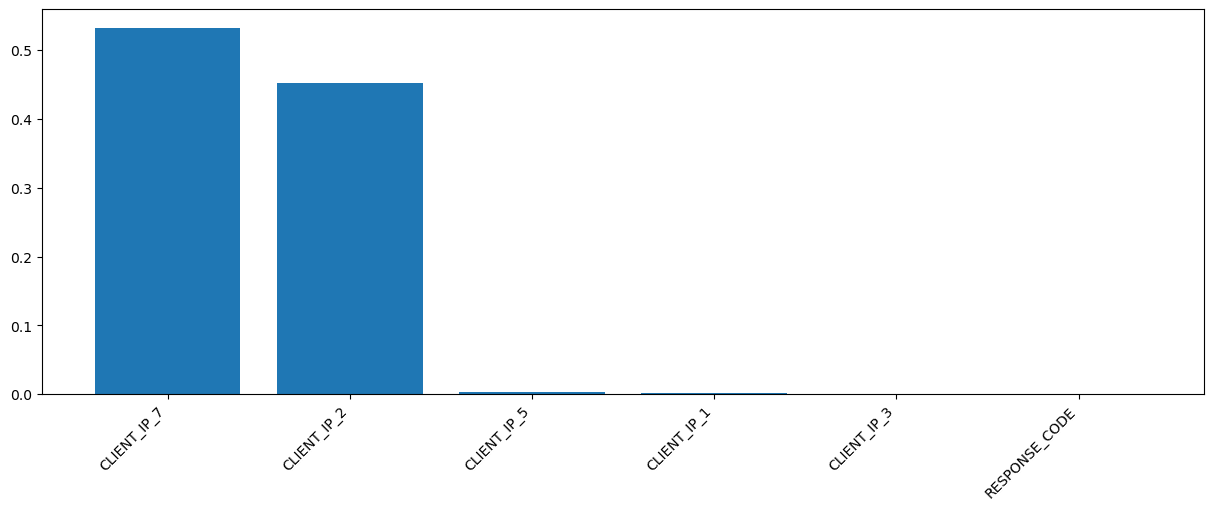

In [29]:
# Plot the resulting feature space data
plot_variance_explained(extractor_02)

In [30]:
##############################################################
# 03. The default run with Scaling and Normalization Enabled
#     Using all columns for features but:
#         EVENT_ID, REQUEST_SIZE, CLIENT_IP

In [31]:
# Get the features with additional ignores with Scaling and PCA the data
extractor_03 = FeatureExtractor(ignore_columns=['EVENT_ID', 'REQUEST_SIZE', 'CLIENT_IP'])
X_03 = extractor_03.fit_transform(data_df)

13:56:35 INFO (extractor:61): Actual Non-Feature Columns: ['EVENT_ID', 'REQUEST_SIZE', 'CLIENT_IP']
13:56:35 INFO (extractor:65): Actual Scaling flag: True
13:56:35 INFO (extractor:73): Actual PCA arguments: {'n_components': 0.999999}, the PCA is: Enabled
13:56:35 INFO (extractor:110): Start fitting the Feature Extraction model
13:56:35 INFO (extractor:105): Considering feature columns: ['CLIENT_USERAGENT', 'IS_USERAGENT_VALID', 'RESPONSE_CODE', 'MATCHED_VARIABLE_SRC', 'MATCHED_VARIABLE_NAME', 'MATCHED_VARIABLE_VALUE']
13:56:35 INFO (extractor:115): Fitting the vectorizer for: "CLIENT_USERAGENT"
13:56:35 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_SRC"
13:56:35 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_NAME"
13:56:35 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_VALUE"
13:56:37 INFO (extractor:126): Start fitting the scaler
13:56:37 INFO (extractor:131): Start fitting the PCA
13:56:37 INFO (extractor:134): Fitting 

13:56:45 INFO (extractor:139): The PCA feature name out:
['pca0' 'pca1' 'pca2' 'pca3' 'pca4' 'pca5' 'pca6' 'pca7' 'pca8' 'pca9'
 'pca10' 'pca11' 'pca12' 'pca13' 'pca14' 'pca15' 'pca16' 'pca17' 'pca18'
 'pca19' 'pca20' 'pca21' 'pca22' 'pca23' 'pca24' 'pca25' 'pca26' 'pca27'
 'pca28' 'pca29' 'pca30' 'pca31' 'pca32' 'pca33' 'pca34' 'pca35' 'pca36'
 'pca37' 'pca38' 'pca39' 'pca40' 'pca41' 'pca42' 'pca43' 'pca44']
13:56:45 INFO (extractor:147): The PCA components (absolute, maximum) relations with features:
pca0                 RESPONSE_CODE
pca1        MATCHED_VARIABLE_SRC_1
pca2            CLIENT_USERAGENT_4
pca3        MATCHED_VARIABLE_SRC_3
pca4        MATCHED_VARIABLE_SRC_0
pca5        MATCHED_VARIABLE_SRC_3
pca6            CLIENT_USERAGENT_2
pca7        MATCHED_VARIABLE_SRC_4
pca8       MATCHED_VARIABLE_NAME_3
pca9        MATCHED_VARIABLE_SRC_4
pca10     MATCHED_VARIABLE_NAME_12
pca11     MATCHED_VARIABLE_NAME_11
pca12     MATCHED_VARIABLE_NAME_10
pca13           CLIENT_USERAGENT_2
pc

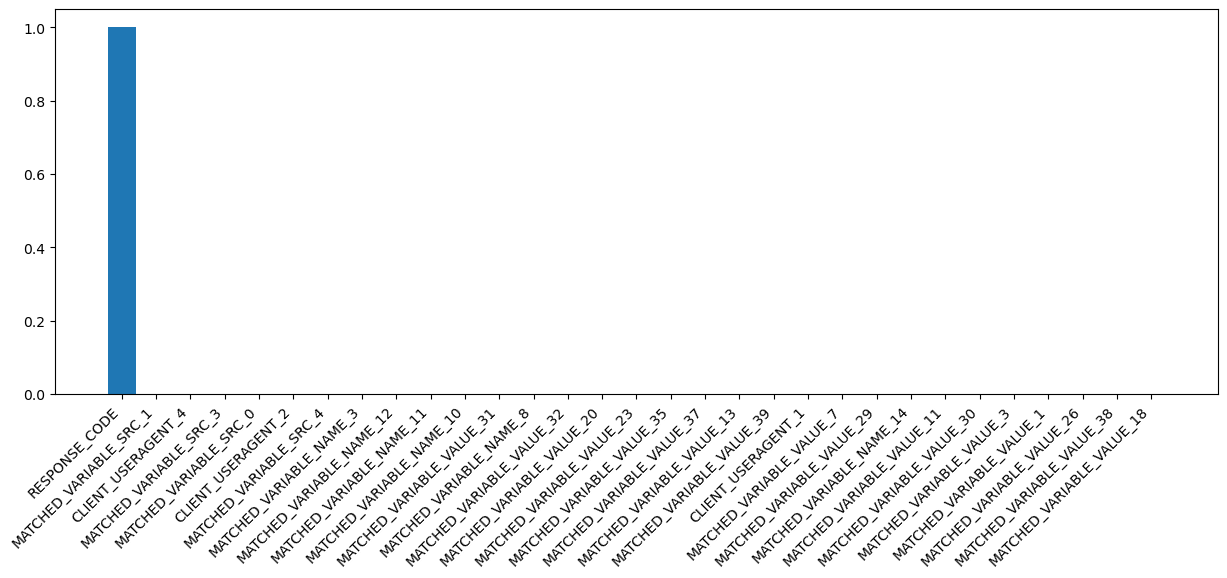

In [32]:
# Plot the resulting feature space data
plot_variance_explained(extractor_03)

In [16]:
##############################################################
# 04. The default run with Scaling and Normalization Enabled
#     Using all columns for features but:
#         EVENT_ID, REQUEST_SIZE, CLIENT_IP, RESPONSE_CODE

In [33]:
# Get the features with additional ignores with Scaling and PCA the data
extractor_04 = FeatureExtractor(ignore_columns=['EVENT_ID', 'REQUEST_SIZE', 'CLIENT_IP', 'RESPONSE_CODE'])
X_04 = extractor_04.fit_transform(data_df)

13:58:22 INFO (extractor:61): Actual Non-Feature Columns: ['EVENT_ID', 'REQUEST_SIZE', 'CLIENT_IP', 'RESPONSE_CODE']
13:58:22 INFO (extractor:65): Actual Scaling flag: True
13:58:22 INFO (extractor:73): Actual PCA arguments: {'n_components': 0.999999}, the PCA is: Enabled
13:58:22 INFO (extractor:110): Start fitting the Feature Extraction model
13:58:22 INFO (extractor:105): Considering feature columns: ['CLIENT_USERAGENT', 'IS_USERAGENT_VALID', 'MATCHED_VARIABLE_SRC', 'MATCHED_VARIABLE_NAME', 'MATCHED_VARIABLE_VALUE']
13:58:22 INFO (extractor:115): Fitting the vectorizer for: "CLIENT_USERAGENT"
13:58:22 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_SRC"
13:58:22 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_NAME"
13:58:22 INFO (extractor:115): Fitting the vectorizer for: "MATCHED_VARIABLE_VALUE"
13:58:24 INFO (extractor:126): Start fitting the scaler
13:58:24 INFO (extractor:131): Start fitting the PCA
13:58:24 INFO (extractor:134): Fitting 

13:58:43 INFO (extractor:139): The PCA feature name out:
['pca0' 'pca1' 'pca2' 'pca3' 'pca4' 'pca5' 'pca6' 'pca7' 'pca8' 'pca9'
 'pca10' 'pca11' 'pca12' 'pca13' 'pca14' 'pca15' 'pca16' 'pca17' 'pca18'
 'pca19' 'pca20' 'pca21' 'pca22' 'pca23' 'pca24' 'pca25' 'pca26' 'pca27'
 'pca28' 'pca29' 'pca30' 'pca31' 'pca32' 'pca33' 'pca34' 'pca35' 'pca36'
 'pca37' 'pca38' 'pca39' 'pca40' 'pca41' 'pca42' 'pca43' 'pca44' 'pca45'
 'pca46' 'pca47' 'pca48' 'pca49' 'pca50' 'pca51' 'pca52' 'pca53' 'pca54'
 'pca55' 'pca56' 'pca57' 'pca58' 'pca59' 'pca60' 'pca61' 'pca62' 'pca63']
13:58:43 INFO (extractor:147): The PCA components (absolute, maximum) relations with features:
pca0        MATCHED_VARIABLE_SRC_1
pca1            CLIENT_USERAGENT_4
pca2        MATCHED_VARIABLE_SRC_1
pca3        MATCHED_VARIABLE_SRC_0
pca4        MATCHED_VARIABLE_SRC_3
                   ...            
pca59    MATCHED_VARIABLE_VALUE_21
pca60    MATCHED_VARIABLE_VALUE_12
pca61    MATCHED_VARIABLE_VALUE_36
pca62      MATCHED_VARI

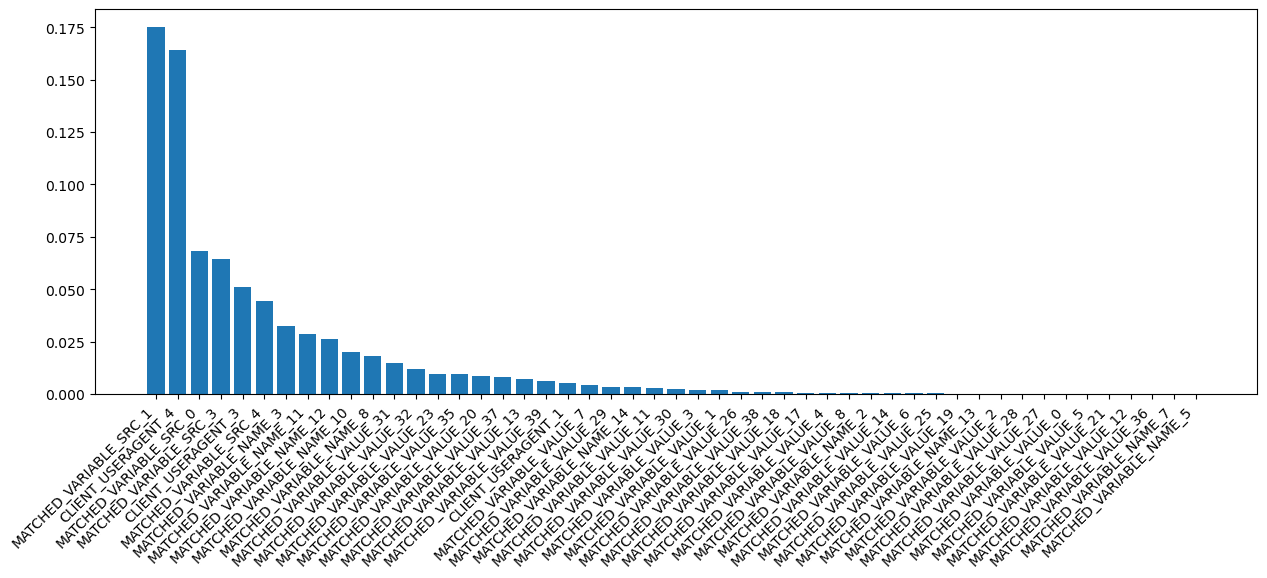

In [34]:
# Plot the resulting feature space data
plot_variance_explained(extractor_04)

In [26]:
#############################################################################
# Conclusions:
#    Note: The following holds for both for scaling being on and off, can be re-run
#    with is_scale=False for FeatureExtractor.
#    Based on the experiment above, what one can see is the the IP address, the request
#    size, and responce code are prevaling. In other words the following column features together
#    (or even individually, see the incremental steps above) explain most of the data variance:
#        REQUEST_SIZE, CLIENT_IP, RESPONSE_CODE
#    This observation can be interpreted as if one uses these features then the downstream
#    clusters will turn out to be largerly driven by these column values.
#
#    If the aforementioned features (columns) are ignored, see the last experiment 04, then
#    we have a nice looking curve that resembles the probability density function of an
#    exponential distribution.
#
#############################################################################